# Web Scraping with Python and Selenium

## Set working directory

In [12]:
# Set working directory
import os
os.chdir('/Users/andreazkb/Documents/ZHAW/ADS/Labs/week 2/web_scraping_python_selenium_bs4_example')

# Warnings settings
import warnings
warnings.filterwarnings("ignore")

## Import a list with user agents

In [1]:
# Lis with randomly choosed user-agents for rotation
ua_path = "user_agents.txt"
ua_list = [line.rstrip('\n') for line in open(ua_path)]
ua_list[:5]

FileNotFoundError: [Errno 2] No such file or directory: 'user_agents.txt'

## Chrome headless mode (without graphical user interface)

In [16]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import random

# Set options
opts = Options()
opts.add_argument("--headless")
opts.add_argument("user-agent=" + random.choice(ua_list))
driver = webdriver.Chrome(executable_path='chromedriver.exe', options=opts)

# Website to scrape
driver.get('https://www.bio-suisse.ch/de/unser-verband/bio-suisse-portraet.html')

# Get current url
print(driver.current_url)

# Return the full page HTML code
# print(driver.page_source)

# Gets the page's title
print(driver.title)

# Close driver
driver.close()

WebDriverException: Message: 'chromedriver.exe' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


## Chrome regular mode (opens a web browser)

In [17]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import random

opts = Options()
opts.add_argument("--window-size=1200,800")
opts.add_argument("user-agent=" + random.choice(ua_list))
driver = webdriver.Chrome(executable_path='chromedriver.exe', options=opts)

# Website to scrape
driver.get('https://www.bio-suisse.ch/de/unser-verband/bio-suisse-portraet.html')

# Get current url
print(driver.current_url)

print('----------------------------------------------')

# Gets the page's title
print(driver.title)

# Return the full page HTML code
# print(driver.page_source)

WebDriverException: Message: 'chromedriver.exe' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


## Creating screenshots from websites

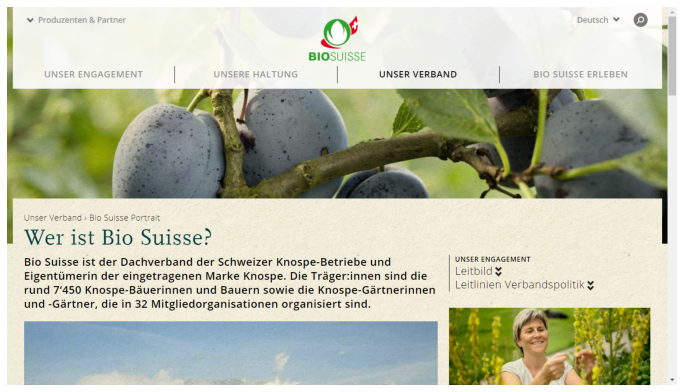

In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import random

opts = Options()
opts.add_argument("--window-size=1200,800")
opts.add_argument("user-agent=" + random.choice(ua_list))
driver = webdriver.Chrome(executable_path='chromedriver.exe', options=opts)

# Website to scrape
driver.get('https://www.bio-suisse.ch/de/unser-verband/bio-suisse-portraet.html')

# Screenshot
driver.save_screenshot('screenshot.png')

# Close driver
driver.close()

# Plot image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = mpimg.imread('screenshot.png')
plt.figure(figsize=(12,12))
plt.axis('off')
imgplot = plt.imshow(img)

## Locating elements

There are different methods available in the Selenium API to select elements on the page. You can use:

- Name
- Tag name
- Class name
- ID
- XPath
- CSS selectors

Use the inspect element function in Chrome to get these infos:
https://www.hostinger.com/tutorials/website/how-to-inspect-and-change-style-using-google-chrome

In [21]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import random

opts = Options()
opts.add_argument("--window-size=1200,800")
opts.add_argument("user-agent=" + random.choice(ua_list))
driver = webdriver.Chrome(executable_path='chromedriver.exe', options=opts)

# Website to scrape
driver.get('https://www.labelinfo.ch')

# Examples using tag name
text = driver.find_element_by_xpath('/html/body/section[2]/div/div/div[2]/div/ul').text

# Further examples (find out by yourself)
# text = driver.find_element_by_name('').text
# text = driver.find_element_by_tag_name('').text
# text = driver.find_element_by_id('').text
# text = driver.find_element_by_css_selector('').text

print(text)

WebDriverException: Message: 'chromedriver.exe' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


In [22]:
# Find elements by tag-name
element = driver.find_element_by_tag_name('p').text
print(element)

# Close driver
driver.close()

NameError: name 'driver' is not defined

## Sent and submit text

In [23]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import random

# Set Options
opts = Options()
opts.add_argument("--window-size=1200,800")
opts.add_argument("user-agent=" + random.choice(ua_list))
driver = webdriver.Chrome(executable_path='chromedriver.exe', options=opts)

# Website to scrape
driver.get('https://de.wikipedia.org/wiki/Wikipedia:Hauptseite')

WebDriverException: Message: 'chromedriver.exe' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


In [24]:
# Fill in the search text
text_to_send = 'Currywurst'
element = driver.find_element_by_xpath('/html/body/div[5]/div[1]/div[2]/div/div/form/div/input[1]')
element.send_keys(text_to_send)

NameError: name 'driver' is not defined

In [25]:
# Submit search text
element.submit()

NameError: name 'element' is not defined

In [26]:
# Extract text
element = driver.find_element_by_tag_name('p').text
print(element)

NameError: name 'driver' is not defined

In [27]:
import time

# Wait until the website is showing up
time.sleep(5)

# Click link to image on page found
driver.find_element_by_xpath('//*[@id="mw-content-text"]/div[1]/div[2]/div/a').click()

NameError: name 'driver' is not defined

In [ ]:
# Screenshot
time.sleep(5)
driver.save_screenshot('screenshot.png')

# Close driver
driver.close()

# Plot image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = mpimg.imread('screenshot.png')
plt.figure(figsize=(12,12))
plt.axis('off')
imgplot = plt.imshow(img)

## Pagination handling (Minergie buildings example)

In [28]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import random
import time

opts = Options()
opts.add_argument("--window-size=1200,800")
opts.add_argument("user-agent=" + random.choice(ua_list))
driver = webdriver.Chrome(executable_path='chromedriver.exe', options=opts)

# Open file-connection
MyFile = open('minergie_objects.txt', 'w', encoding='utf-8')

obj = {}    

# Loop through first 5 pages and save objects to file
for i in range(5):
    
    # Generating URLs using page numbers
    url = str('https://www.minergie.ch/de/gebaeude/gebaeudeliste/?canton=&country=&zip_place=&street_nr=&gid=&participator=&typeofuse=&constructiontype=&year=&sortby=date_asc&numres=12&p=' + str(i+1))
    time.sleep(2)
    driver.get(url)
    
    print(str('--------- Page:' + str(i+1) + '-------------------------------'))
    
    for n in range(12):
        
        path = str('/html/body/div/div[4]/div[5]/div/div[' + str(n+1) + ']')
        obj['Object'] = driver.find_element_by_xpath(path).text
        obj['Object'] = obj['Object'].replace("\n", "")
        print(obj['Object'])
        
        # Write to file
        MyFile.write(obj['Object'] + "\n")
        
# Close file-connection
MyFile.close()

# Close driver
driver.close()

WebDriverException: Message: 'chromedriver.exe' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


## Lord of the Rings example (see lecture)

In [15]:
# Libraries
import os
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys

# Set working directory
os.chdir('U:/Lektionen/ADS_FS2022/Dokumente_KK/Week_02')

# Set webdriver options
opts = Options()
opts.add_argument("--window-size=1200,800")
driver = webdriver.Chrome(executable_path='chromedriver.exe', options=opts)

# Start website
driver.get('https://en.wikipedia.org/wiki/Main_Page')

# Fill in the search text
text_to_send = 'The Lord of the Rings'
element = driver.find_element_by_xpath('/html/body/div[5]/div[1]/div[2]/div/div/form/div/input[1]')
element.send_keys(text_to_send)

# Submit search text
element.submit()

# Extract text
element = driver.find_element_by_xpath('//*[@id="mw-content-text"]/div[1]/p[3]').text
print(element)

# Close driver
driver.close()

The title refers to the story's main antagonist, the Dark Lord Sauron, who in an earlier age created the One Ring to rule the other Rings of Power given to Men, Dwarves, and Elves, in his campaign to conquer all of Middle-earth. From homely beginnings in the Shire, a hobbit land reminiscent of the English countryside, the story ranges across Middle-earth, following the quest to destroy the One Ring mainly through the eyes of the hobbits Frodo, Sam, Merry and Pippin.


## 3D-map search example (see lecture)

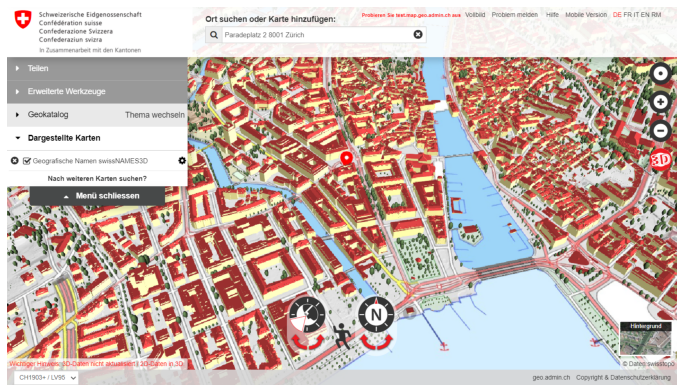

In [16]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

# Set working directory
os.chdir('U:/Lektionen/ADS_FS2022/Dokumente_KK/Week_02')

# Set webdriver options
opts = Options()
opts.add_argument("--window-size=1200,800")
driver = webdriver.Chrome(executable_path='chromedriver.exe', options=opts)

driver.get('https://map.geo.admin.ch/?lang=de&topic=ech&bgLayer=ch.swisstopo.pixelkarte-farbe&layers=ch.swisstopo.swissnames3d&pegman=true&lon=8.52429&lat=47.36230&elevation=1500&heading=360.000&pitch=-45.000')
    
# Submit address
element = driver.find_element_by_xpath('//*[@id="search-container"]/div/form/span[2]/input')
element.send_keys("Paradeplatz 2 8001 Zürich")

# Wait some seconds until the map is available
submit = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="search-container"]/div/form/span[2]/span/div[1]/div/div[2]/div[1]/div/b/span[1]'))) 
submit.click()

# Save screenshot
time.sleep(10)
driver.save_screenshot('screenshot.png')

# Close driver
driver.close()

# Plot screenshot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = mpimg.imread('screenshot.png')
plt.figure(figsize=(12,12))
plt.axis('off')
imgplot = plt.imshow(img)